In [1]:
from fastai.data.all import *

In [2]:
from fastai.vision.all import *

In [3]:
from rhana.labeler.unet import *

In [4]:
from skimage import io as skm_io

In [5]:
import numpy as np

In [102]:
import pdb

# Fastai demo

# Load Data

In [54]:
training_data_folder = Path("../data/training_data")

In [55]:
!ls {training_data_folder}

IT003  IT005  IT007  IT009  IT011  IT013  IT015  IT017	semantic_all.csv
IT004  IT006  IT008  IT010  IT012  IT014  IT016  IT018	semantic_all_old.csv


In [56]:
ls {training_data_folder}

../data/training_data@


In [72]:
df = pd.read_csv(training_data_folder / "semantic_all.csv")

In [73]:
df

,EncodedPixels,Image,Label
0,1003 7 1403 7 1806 1 12153 6 12552 8 12951 10 13351 11 13750 13 14150 13 14550 13 14951 11 15351 10 15751 10 16153 8 16553 7 17804 4 18203 6 18601 9 19001 10 19401 10 19801 10 20201 10 20601 9 21002 8 21402 8 21803 5 22203 4 24655 2 25050 9 25449 11 25849 12 26249 12 26648 14 27048 14 27449 12 27849 12 28249 11 28649 10 29053 4 37004 1 37007 1 37403 6 37802 9 38201 11 38601 11 39001 11 39401 12 39801 11 40202 9 40603 8 41005 4,IT013/IT013-00000002710866284600-0130.png,spot
1,1803 6 2203 6 2603 7 3003 7 3402 9 3802 9 4201 11 4601 11 5001 11 5401 11 5801 11 6201 11 6601 11 7001 11 7401 11 7801 11 8200 12 8600 12 9000 12 9400 12 9800 12 10200 12 10600 12 10655 2 11000 12 11055 2 11400 12 11455 2 11800 12 11855 3 12200 12 12255 3 12600 12 12655 3 13000 12 13053 5 13400 12 13453 5 13800 12 13853 5 14200 12 14253 5 14600 12 14653 5 15000 12 15053 6 15400 12 15453 5 15800 12 15853 5 16200 12 16255 3 16600 12 16655 3 17000 12 17055 3 17400 12 17455 2 17800 11 17855 2 18200 11 18255 3 18600 11 18655 2 19000 11 19055 2 19355 2 19400 11 19455 2 19755 2 19800 11 19856 1 2...,IT013/IT013-00000002710866284600-0130.png,stripe
2,11853 1 12148 2 12253 5 12548 3 12651 7 12948 3 13049 11 13348 3 13449 11 13748 3 13849 12 14150 1 14249 12 14649 12 15049 12 15449 12 15849 12 16251 9 16651 7 17055 1 19801 4 20198 8 20597 10 20996 12 21396 12 21796 13 22196 13 22595 14 22995 14 23396 13 23795 14 24196 12 24597 11 24996 1 24998 9 25399 8 25801 3,IT013/IT013-00000002519942717100-0130.png,spot
3,201 3 601 5 999 8 1053 4 1399 9 1452 5 1798 10 1851 7 2198 10 2251 8 2597 12 2651 8 2997 12 3051 9 3397 12 3450 10 3797 12 3850 10 4197 12 4249 11 4597 12 4649 11 4997 12 5049 11 5397 12 5449 11 5751 1 5797 12 5849 11 6151 2 6197 12 6249 11 6548 6 6597 12 6649 12 6948 6 6997 12 7049 12 7347 7 7397 12 7449 12 7747 7 7796 13 7849 12 8147 8 8196 13 8249 11 8547 8 8596 13 8649 12 8947 8 8996 13 9049 12 9347 8 9396 13 9449 12 9747 9 9796 13 9849 12 10147 9 10196 13 10249 11 10547 9 10596 13 10649 12 10947 9 10996 13 11049 12 11347 9 11396 13 11449 12 11747 9 11796 13 11849 12 12065 1 12147 9 12...,IT013/IT013-00000002519942717100-0130.png,stripe
4,1000 9 1399 10 1801 2 1805 3 2201 2 12553 2 12949 10 13349 11 13749 11 14149 11 14549 12 14949 12 15349 10 15750 8 16151 6 16551 4 18205 1 18602 4 19001 6 19401 5 19800 7 20200 7 20600 7 21001 5 21401 4 21801 4 22201 4 25049 9 25448 11 25847 12 26247 12 26647 13 27047 13 27447 12 27847 12 28247 12 28648 10 29049 8 29452 1 38599 8 38999 8 39398 11 39798 11 40198 11 40598 11 40999 10 41399 10 41799 8 42200 7 42602 2,IT013/IT013-00000003289845010600-0130.png,spot
...,...,...,...
24751,998 3 1396 6 1795 8 2195 9 2594 11 2994 11 3393 13 3793 13 4193 13 4593 14 4993 14 5393 14 5792 15 5849 5 6192 15 6248 7 6592 15 6647 9 6992 15 7047 9 7347 2 7392 15 7447 10 7747 2 7792 15 7846 11 8145 5 8192 15 8245 12 8544 7 8592 15 8645 12 8943 8 8992 16 9045 12 9343 8 9392 16 9445 12 9742 10 9792 16 9845 12 10142 10 10192 16 10245 12 10332 5 10464 5 10542 10 10592 15 10645 12 10731 8 10864 5 10941 11 10992 15 11045 12 11130 9 11262 8 11342 10 11392 16 11445 12 11529 11 11661 9 11742 10 11792 16 11845 13 11929 11 12060 10 12142 10 12192 16 12245 12 12328 12 12459 11 12542 10 12592 16 12...,IT011/IT011-00000006734971525200-0030.png,stripe
24752,6598 1 6600 1 6997 6 7396 9 7795 10 8194 12 8593 14 8994 12 9394 12 9795 11 10195 10 10597 7 10999 2 19000 1 19350 3 19494 7 19747 10 19800 1 19893 8 20146 11 20293 10 20546 11 20597 1 20600 2 20603 1 20693 10 20945 13 20997 2 21000 2 21003 1 21093 11 21344 15 21397 2 21400 5 21493 11 21745 13 21796 9 21893 11 22145 13 22196 9 22293 11 22545 12 22596 10 22693 11 22946 11 22995 11 23094 9 23348 6 23394 13 23495 7 23749 2 23794 13 23896 3 24193 14 24593 14 24994 13 25394 13 25794 13 26194 13 26594 13 26994 13 27395 11 27796 10 28197 7 28596 8 28997 5 29003 1 29397 4 31703 3 32101 9 32501 10 ...,IT011/IT011-00000007217460377300-0040.png,spot
24753,997 6 1396 7 1795 9 2195 9 259

In [74]:
df = df.pivot(index="Image", columns="Label", values="EncodedPixels")

In [75]:
root = training_data_folder
# root = training_data_folder.absolute()

In [76]:
exp_code = df.index.map(lambda x: x.split("/")[0]).unique().values

In [77]:
df.index = df.index.map( lambda x: os.path.join(root, x) )

In [78]:
row= df.iloc[0]; row

Label
spot                                                                                                                                                                                                                                                                                                                                                                                                                             40197 6 40205 2 40596 11 40995 12 41395 12 41793 16 42193 16 42593 16 42993 16 43393 16 43793 16 44193 16 44593 16 44993 16 45393 16 45794 15 46195 14 46597 10 46997 10 47398 2 47401 5 47801 3
stripe    2598 7 2998 7 3397 10 3797 10 4196 12 4596 12 4996 12 5396 12 5795 13 6195 13 6595 14 6995 14 7395 14 7795 14 8195 14 8595 14 8995 14 9395 14 9795 14 10195 14 10595 14 10995 14 11395 14 11795 14 12195 14 12595 14 12995 14 13395 14 13795 14 14195 14 14595 14 14995 14 15395 14 15795 14 16195 14 16595 14 16995 14 17395 14 17795 14 18195 14 18595 14 18995 14 19395 14 19795 14

# Create Dataset

In [81]:
img_path = df.index[0]

img = RHEEDTensorImage.create(img_path)
print(img)

RHEEDTensorImage: torch.Size([3, 200, 400])


<AxesSubplot:>

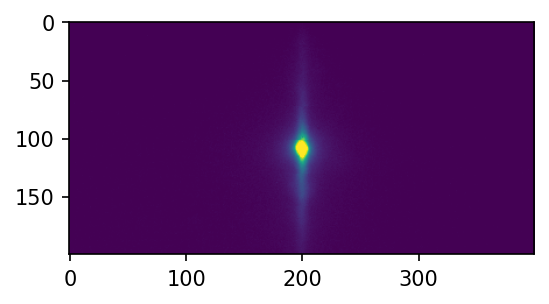

In [83]:
_, ax = plt.subplots(1, 1, figsize=(4, 8), dpi=150)
img.show(ctx=ax)

In [84]:
isinstance(df.index[0], str)

True

In [85]:
mask = RHEEDTensorMask.create(df.iloc[0], shape=(200,400))

In [86]:
print(mask.shape)

torch.Size([2, 200, 400])


<AxesSubplot:>

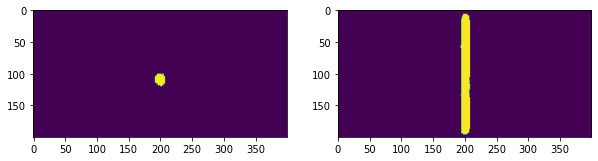

In [87]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
mask.show(chn=0, ctx=ax[0])
mask.show(chn=1, ctx=ax[1])

In [88]:
def get_lbl_fn(img_fn: Path, df: DataFrame):
    """
        Not used. Could use partial to assign the actual dataframe to the df argument
    """
    row = df.loc[img_fn]
    return row

def split_by_exp(val_exps):
    def _split_by_exp(x):
        if isinstance(x, Path) or isinstance(x, str):
            path = x
        elif isinstance(x, pd.Series):
            path = x.name 
        exp_code = path.split("/")[1]
        return exp_code in val_exps
            
    return _split_by_exp

val_exps = np.random.choice(exp_code, size=2, replace=False)
    
# splitter = RandomSplitter(valid_pct=0.1) # valid on random sample
splitter = FuncSplitter(split_by_exp(val_exps))

In [89]:
val_exps

array(['IT005', 'IT006'], dtype=object)

In [90]:
df.index[:5]

Index(['../data/training_data/IT003/IT003-700-_10.png',
       '../data/training_data/IT003/IT003-700-_100.png',
       '../data/training_data/IT003/IT003-700-_1000.png',
       '../data/training_data/IT003/IT003-700-_1001.png',
       '../data/training_data/IT003/IT003-700-_1002.png'],
      dtype='object', name='Image')

In [91]:
val_exps

array(['IT005', 'IT006'], dtype=object)

In [92]:
splitter(df.index[:5])

((#5) [0,1,2,3,4], (#0) [])

In [93]:
splitter([ root / f"{val_exps[0]}/001.png" ])

((#0) [], (#1) [0])

In [94]:
# use the whole df as items
db = DataBlock(blocks=(TransformBlock(type_tfms=partial(RHEEDTensorImage.create, chnls_first=True)),
                       TransformBlock(type_tfms=partial(RHEEDTensorMask.create, chnls_first=True, shape=(200, 400)), 
                                      item_tfms=AddMaskCodes(codes=df.columns)),
                      ),
               get_items=lambda x: x,
               get_y = noop,
               get_x = noop,
               splitter=RandomSplitter(valid_pct=0.1)
              )

In [95]:
db.summary(source=df)

Setting-up type transforms pipelines
Image                                                                                                                                                                                                                                                                          
../data/training_data/IT003/IT003-700-_10.png                               40197 6 40205 2 40596 11 40995 12 41395 12 41793 16 42193 16 42593 16 42993 16 43393 16 43793 16 44193 16 44593 16 44993 16 45393 16 45794 15 46195 14 46597 10 46997 10 47398 2 47401 5 47801 3   
../data/training_data/IT003/IT003-700-_100.png                      39801 2 39805 1 40197 10 40596 11 40995 12 41394 14 41793 16 42193 16 42593 16 42993 16 43393 16 43793 16 44193 16 44593 16 44993 16 45394 15 45794 15 46195 13 46597 10 46997 9 47398 2 47401 2 47801 1   
../data/training_data/IT003/IT003-700-_1000.png                                     39400 3 39405 1 39798 9 40195 12 40595 13 40994 14 41394 14 417

In [96]:
ds = db.datasets(source=df)

<AxesSubplot:>

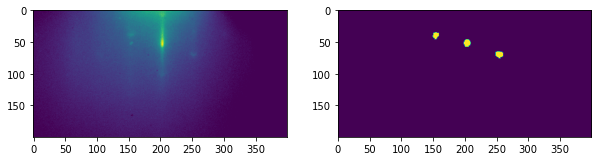

In [97]:
idx = 1
img = ds.train[idx][0]
msk = ds.train[idx][1]

_, ax = plt.subplots(1, 2, figsize=(10, 5))
img.show(ctx=ax[0])
msk.show(ctx=ax[1])

In [98]:
dls = ds.dataloaders(bs=4, num_workers=4)

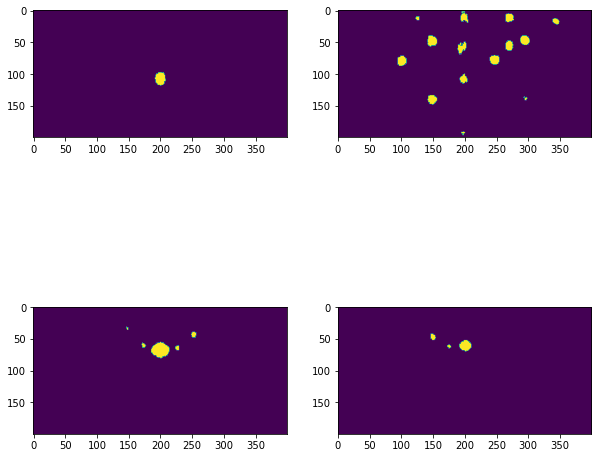

In [99]:
dls.show_batch(figsize=(10,10))

In [105]:
x, y = dls.one_batch()
type(x), type(y)

(rhana.labeler.unet.RHEEDTensorImage, rhana.labeler.unet.RHEEDTensorMask)

In [111]:
np.array(x.detach().cpu()).max()

0.9254902

In [112]:
# uncomment this line if you want to check your gpu usage
# !nvidia-smi

In [113]:
learn = unet_learner(dls, resnet18, loss_func=BCEWithLogitsLossFlat(), n_out=len(df.columns), metrics=[dice_metric])

In [114]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,dice_metric,time
0,0.010483,0.009101,0.950952,06:18


epoch,train_loss,valid_loss,dice_metric,time
0,0.008024,0.007065,0.962562,06:34
1,0.007281,0.007271,0.965286,06:34
2,0.006590,0.005994,0.967661,06:35
3,0.004939,0.005332,0.972764,06:35
4,0.004683,0.005120,0.974201,06:35


In [128]:
ls ../

data/     notebook/  requirements.txt  rhana.egg-info/  tests/
learner/  README.md  rhana/            setup.py


In [117]:
learner_folder = Path("../learner")
learner_folder.mkdir(exist_ok=True)

In [118]:
from datetime import datetime

In [120]:
learn_id = datetime.today().strftime("%H%M_%b%d_%Y")
learn_path = learner_folder/f"UNet_{learn_id}.pkl"
learn_path

Path('../learner/UNet_1605_Apr24_2022.pkl')

In [121]:
learn.export(learn_path)

# Inference

## Single rheed image

In [122]:
learner_folder = Path("../learner")

In [131]:
ls ../learner

UNet_1605_Apr24_2022.pkl  UNet_May6_2021_fixed.pkl


In [132]:
learn = load_learner(learner_folder/"UNet_May6_2021_fixed.pkl")

In [133]:
additional = [
    "IT020",
    "IT021",
]

In [66]:
!ln -s /home/aurora/RHEED/data/RHEED/ ../data/raw

In [68]:
!ls ../data/raw

 after-depo   IT011   IT020-RHEED.zip   IT025		  IT030-RHEED.zip
 IT003	      IT012   IT021	        IT025-RHEED.zip   JPG
 IT004	      IT013   IT021-RHEED.zip   IT027		  maskIT005.pcd
 IT005	      IT014   IT022	        IT027-RHEED.zip   maskIT005.png
 IT006	      IT015   IT022-RHEED.zip   IT028		  mask.png
 IT007	      IT016   IT023	        IT028-RHEED.zip  'power point document'
 IT008	      IT017   IT023-RHEED.zip   IT029		  VI
 IT009	      IT018   IT024	        IT029-RHEED.zip
 IT010	      IT020   IT024-RHEED.zip   IT030


In [ ]:
# from rhana.pattern import Rheed

In [134]:
IT020 = Path("../data/raw/IT020") 
IT020_files = list(IT020.iterdir())

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/IT020'

In [29]:
sample_file = IT020_files[0]

In [30]:
rd = Rheed.from_kashiwa(sample_file)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

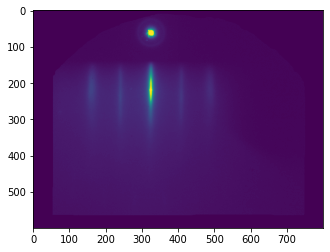

In [31]:
rd.plot_pattern()

In [32]:
proc_rd = rd.mean_clip(inplace=False).min_max_scale(inplace=False)

In [33]:
item = RHEEDTensorImage.create(np.tile(proc_rd.pattern, (3, 1, 1)))

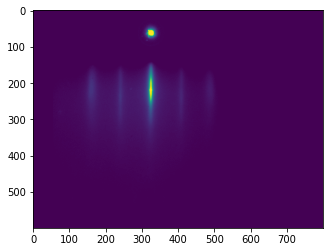

In [34]:
item.show()

In [35]:
result = learn.predict(item)

In [36]:
a,b,c = result

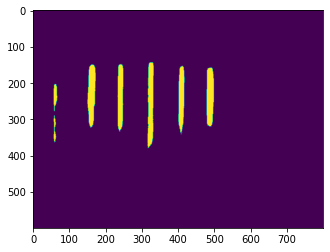

In [37]:
a.show(chn=1)

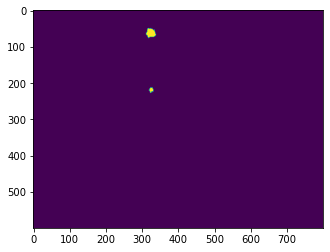

In [63]:
b.show()

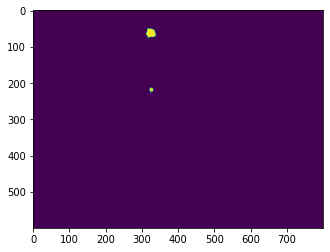

In [38]:
c.show()

## Inference with dataloader

In [ ]:
dls.test_dl() # add test dataloader